In [71]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

reading image from opencv

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

In [110]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape


(555, 700, 3)

555 - x xoordinate;
700 - y coordinate;
3 - rgb channels(any colour can be represented through rgb values)

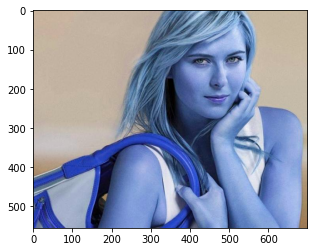

In [111]:
plt.imshow(img)

To change image to gray scale

In [112]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [113]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

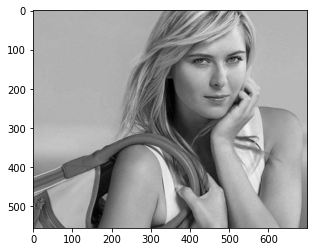

In [114]:
plt .imshow(gray,cmap='gray')

Face Detection using Haar Cascades.
Check this article 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [115]:
face_cascade = cv2.CascadeClassifier('./opencv-master/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv-master/opencv-master/data/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

values in the array -- x,y,width,height

In [116]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

drawing a red coloued rectangle on face--
cv2.rectangle(image, start_point, end_point, color, thickness);
 (255,0,0) is rgb value for red 

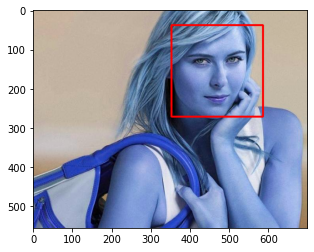

In [117]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

NOw detecting eyes from our face and drawing green rectangle on the eyes

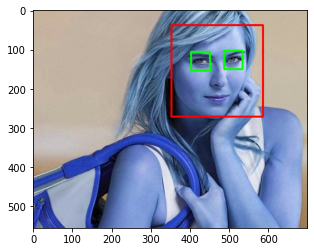

In [118]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

roi is region of interest . We are interested in face from an image 

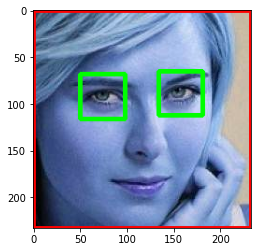

In [119]:
plt.imshow(roi_color,cmap='gray')

now we will use wavelet transform to create a black and white image which will be useful for our classifer to extract important facial features

In [120]:
crop_img = np.array(roi_color)
crop_img.shape

(233, 233, 3)

In [121]:
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

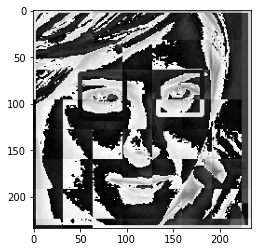

In [123]:
im_har = w2d(crop_img,'db1',5)
plt.imshow(im_har, cmap='gray')

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

lets create a function in which we will input an image and get the final cropped face and eyes detected image(if face and eyes >=2 are detected)

In [93]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

detectMultiScale() Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles

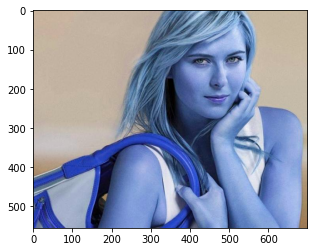

In [94]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

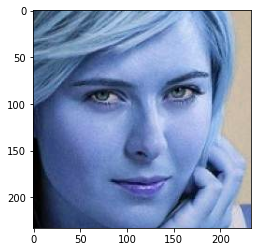

In [107]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

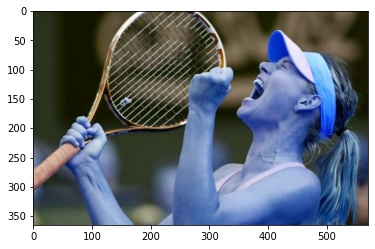

In [96]:
obstructed_image = cv2.imread('./test_images/sharapova2.JPG')
plt.imshow(obstructed_image)

In [97]:
cropped_image_no2 = get_cropped_image_if_2_eyes('./test_images/sharapova2.JPG')
cropped_image_no2

in image 2 the face is obstructed so we cannot get  two eyes so the function returns  none

In [98]:
path_to_data = "./images_dataset"
path_to_cr_data = "./images_dataset/cropped/"

In [99]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [100]:
img_dirs

['./images_dataset/serena_williams',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/virat_kohli',
 './images_dataset/lionel_messi',
 './images_dataset/cropped']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

The shutil module helps you automate copying files and directories. This saves the steps of opening, reading, writing and closing files when there is no actual processing. It is a utility module which can be used to accomplish tasks, such as: copying, moving, or removing directory trees.

In [101]:
import shutil
if os.path.exists(path_to_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

shutil. rmtree() is used to delete an entire directory tree, path must point to a directory (but not a symbolic link to a directory)
Here we are first checking if cropped folder exists then we delete it otherwise we create a new folder

In [102]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]    #here we split the dir name and then choose the last token from it which is the celebrity name
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi


In [124]:
celebrity_file_names_dict

{'serena_williams': ['./images_dataset/cropped/serena_williams/serena_williams1.png',
  './images_dataset/cropped/serena_williams/serena_williams2.png',
  './images_dataset/cropped/serena_williams/serena_williams3.png',
  './images_dataset/cropped/serena_williams/serena_williams4.png',
  './images_dataset/cropped/serena_williams/serena_williams5.png',
  './images_dataset/cropped/serena_williams/serena_williams6.png',
  './images_dataset/cropped/serena_williams/serena_williams7.png',
  './images_dataset/cropped/serena_williams/serena_williams8.png',
  './images_dataset/cropped/serena_williams/serena_williams9.png',
  './images_dataset/cropped/serena_williams/serena_williams10.png',
  './images_dataset/cropped/serena_williams/serena_williams11.png',
  './images_dataset/cropped/serena_williams/serena_williams12.png',
  './images_dataset/cropped/serena_williams/serena_williams13.png',
  './images_dataset/cropped/serena_williams/serena_williams14.png',
  './images_dataset/cropped/serena_wil

In [125]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'serena_williams': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4,
 'cropped': 5}

In [126]:
del class_dict['cropped']

In [127]:
class_dict

{'serena_williams': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

In [129]:
X, y = [] , []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

above we scale our both images(crop image and wavelet ttransformed image) and then we vertically stack them both(one over other)

In [133]:
len(X)

161

In [134]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(161, 4096)

In [135]:
X[0]

array([ 36.,  30.,  23., ..., 233.,  20., 230.])

In [148]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [240]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)

In [242]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9024390243902439

In [243]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       1.00      1.00      1.00         9
           2       0.62      1.00      0.77         5
           3       0.90      1.00      0.95         9
           4       1.00      0.89      0.94         9

    accuracy                           0.90        41
   macro avg       0.91      0.91      0.89        41
weighted avg       0.93      0.90      0.90        41



In [244]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [245]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [246]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.808333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.691667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.858333,{'logisticregression__C': 1}


In [247]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [252]:
best_estimators['svm'].score(X_test,y_test)

0.9024390243902439

In [253]:
best_estimators['random_forest'].score(X_test,y_test)

0.7317073170731707

In [254]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9024390243902439

In [255]:
best_clf = best_estimators['svm']

In [256]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 3, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 9, 0],
       [0, 0, 0, 1, 8]])

Text(69.0, 0.5, 'Truth')

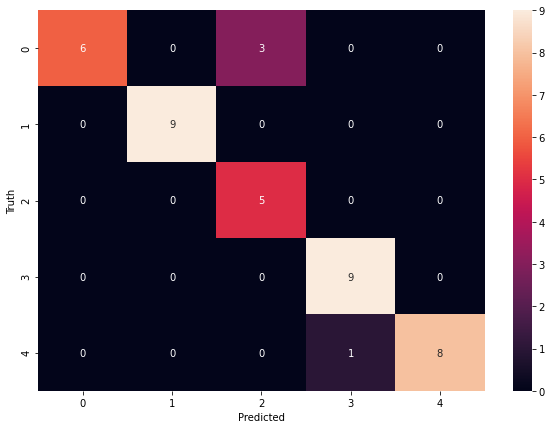

In [257]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [258]:
class_dict

{'serena_williams': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

In [262]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [259]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']